In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [18]:
bank = pd.read_csv('bank-full.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [19]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [20]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [22]:
bank.shape

(45211, 17)

In [24]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Target'>

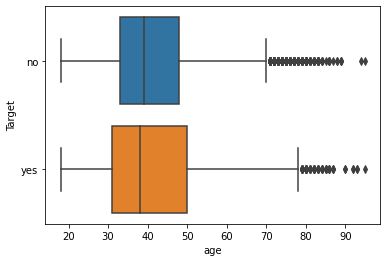

In [25]:
sns.boxplot(x = 'age',y = 'Target', data=bank)

In [26]:

bank = bank.drop(bank.iloc[:,9:11],axis=1)

In [27]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no


In [28]:
bank['Target'] = np.where(bank['Target'].str.contains("yes"),1,0)
bank['loan'] = np.where(bank['loan'].str.contains("yes"),1,0)
bank['default'] = np.where(bank['default'].str.contains("yes"),1,0)
bank['housing'] = np.where(bank['housing'].str.contains("yes"),1,0)

<AxesSubplot:xlabel='Target', ylabel='count'>

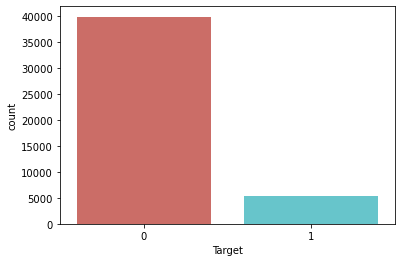

In [29]:
sns.countplot(x='Target',data=bank,palette='hls')

In [30]:
# One-Hot Encoding of categrical variables
df = pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome'])
df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,151,1,-1,0,0,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,76,1,-1,0,0,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1,...,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,1,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,1,...,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,508,4,-1,0,0,...,1,0,0,0,1,0,0,0,0,1


In [31]:
pd.set_option("display.max.columns",None)
df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [32]:
from sklearn.linear_model import LogisticRegression
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   duration             45211 non-null  int64
 6   campaign             45211 non-null  int64
 7   pdays                45211 non-null  int64
 8   previous             45211 non-null  int64
 9   Target               45211 non-null  int32
 10  job_admin.           45211 non-null  uint8
 11  job_blue-collar      45211 non-null  uint8
 12  job_entrepreneur     45211 non-null  uint8
 13  job_housemaid        45211 non-null  uint8
 14  job_management       45211 non-null  uint8
 15  job_retired          45211 non-null  uint8
 16  job_self-employed    4

In [33]:
X=pd.concat([df.iloc[:,0:9],df.iloc[:,10:]],axis=1)
X

,age,default,balance,housing,loan,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,508,4,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [40]:
y = df.iloc[:,9]

In [41]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target, Length: 45211, dtype: int32

In [43]:
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\UMANA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
classifier.coef_

array([[-1.68010511e-02, -2.62716325e-02,  2.08729031e-05,
        -9.46611490e-01, -2.65268648e-01,  3.81336051e-03,
        -3.17563576e-01,  2.70304001e-03, -2.19077275e-01,
        -4.67047063e-02, -3.50753333e-01, -3.56123797e-02,
        -9.61392893e-03, -1.93523923e-03,  2.32005924e-01,
        -2.40571322e-02, -1.26624028e-01,  2.98798029e-02,
        -1.09014775e-01,  4.37121230e-03,  4.35134548e-03,
         2.50604595e-02, -2.29845305e-01, -2.28922392e-01,
        -8.73456914e-02, -4.00793350e-01,  3.79186529e-02,
         1.65131509e-02,  8.61022217e-02,  7.13096608e-02,
        -5.91119120e-01, -1.81218392e-01, -4.49159086e-02,
         4.11237751e-01, -6.18810688e-01]])

In [45]:
#check prediction
y_pred = classifier.predict(X)
df["y_pred"] = y_pred
df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_pred
0,58,0,2143,1,0,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,44,0,29,1,0,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
3,47,0,1506,1,0,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
4,33,0,1,0,0,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1
45207,71,0,1729,0,0,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
45208,72,0,5715,0,0,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1
45209,57,0,668,0,0,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0


In [46]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
df1=pd.concat([df,y_prob],axis=1) 
df1                  
     

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_pred,0,1
0,58,0,2143,1,0,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0.954299,0.045701
1,44,0,29,1,0,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0.978376,0.021624
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0.983804,0.016196
3,47,0,1506,1,0,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0.979807,0.020193
4,33,0,1,0,0,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0.877758,0.122242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0.340015,0.659985
45207,71,0,1729,0,0,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0.701083,0.298917
45208,72,0,5715,0,0,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0.245170,0.754830
45209,57,0,668,0,0,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0.903969,0.096031


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
confusion_matrix


array([[39170,   752],
       [ 4126,  1163]], dtype=int64)

In [48]:

pd.crosstab(y_pred,Y)


Target,0,1
row_0,,
0,39170,4126
1,752,1163


In [49]:
accuracy=sum(Y==y_pred)/df.shape[0]
accuracy

0.892105903430581

In [50]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.61      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.76      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score

0.600526803405798

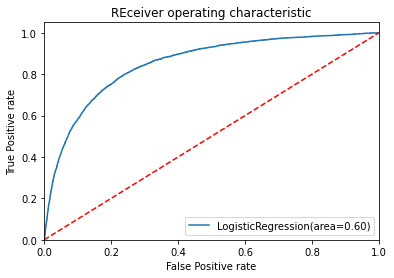

In [52]:
fpr,tpr,thresold=roc_curve(Y,classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr,label='LogisticRegression(area=%0.2f)'%Logit_roc_score)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("REceiver operating characteristic")
plt.legend(loc='lower right')
plt.show()

In [53]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1])


In [55]:
y_prob1

,0
0,0.045701
1,0.021624
2,0.016196
3,0.020193
4,0.122242
...,...
45206,0.659985
45207,0.298917
45208,0.754830
45209,0.096031


In [56]:
import statsmodels.api as sm


In [57]:
logit=sm.Logit(Y,X)
logit

In [58]:
logit.fit().summary()


Optimization terminated successfully.
         Current function value: 0.249986
         Iterations 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45180
Method:                           MLE   Df Model:                           30
Date:                Sat, 22 Apr 2023   Pseudo R-squ.:                  0.3073
Time:                        12:00:00   Log-Likelihood:                -11302.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                     0.0016      0.002      0.722      0.470      -0.003       0.006
default                -0.1659      0.161     -1.028      0.304      -0.482       0.150
balance              1.762e-05   4.86e-06      3.626      0.000     8.1e-06    2.71e-05
housing                -0.7689      0.040    -19.435      0.000      -0.846      -0.691
loan                   -0.5633      0.058     -9.678      0.000      -0.677      -0.449
duration                0.0041   6.27e-05     64.617      0.000       0.004       0.004
campaign               -0.1095      0.010    -11.053      0.000      -0.129      -0.090
pdays                   0.0002      0.000      0.648      0.517      -0.000       0.001
previous                0.0106      0.007      1.625      0.104      -0.002       0.023
job_admin.              0.0334        nan        nan        nan         nan         nan
job_blue-collar        -0.3593        nan        nan        nan         nan         nan
job_entrepreneur       -0.4521        nan        nan        nan         nan         nan
job_housemaid          -0.4932        nan        nan        nan         nan         nan
job_management         -0.1953        nan        nan        nan         nan         nan
job_retired             0.3744        nan        nan        nan         nan         nan
job_self-employed      -0.3490        nan        nan        nan         nan         nan
job_services           -0.2785        nan        nan        nan         nan         nan
job_student             0.5378        nan        nan        nan         nan         nan
job_technician         -0.2397        nan        nan        nan         nan         nan
job_unemployed         -0.1861        nan        nan        nan         nan         nan
job_unknown            -0.3043        nan        nan        nan         nan         nan
marital_divorced       -0.6382    1.1e+06   -5.8e-07      1.000   -2.15e+06    2.15e+06
marital_married        -0.7968   1.08e+06  -7.37e-07      1.000   -2.12e+06    2.12e+06
marital_single         -0.4770   1.05e+06  -4.53e-07      1.000   -2.06e+06    2.06e+06
education_primary      -0.6883   2.02e+06  -3.41e-07      1.000   -3.96e+06    3.96e+06
education_secondary    -0.5219   2.12e+06  -2.46e-07      1.000   -4.15e+06    4.15e+06
education_tertiary     -0.2846    2.1e+06  -1.36e-07      1.000   -4.11e+06    4.11e+06
education_unknown      -0.4172    2.1e+06  -1.99e-07      1.000   -4.12e+06    4.12e+06
contact_cellular       -0.2244   1.54e+06  -1.46e-07      1.000   -3.01e+06    3.01e+06
contact_telephone      -0.3075   1.54e+06     -2e-07      1.000   -3.01e+06    3.01e+06
contact_unknown        -1.3801   1.54e+06  -8.97e-07      1.000   -3.01e+06    3.01e+06
poutcome_failure       -1.0542   2.08e+06  -5.07e-07      1.000   -4.08e+06    4.08e+06
poutcome_other         -0.8052   2.08e+06  -3.87e-07      1.000   -4.08e+06    4.08e+06
poutcome_success        1.2441   2.08e+06   5.98e-07      1.000   -4.08e+

In [59]:
fpr

array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
       9.98998046e-01, 9.98998046e-01, 1.00000000e+00])

In [60]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])